# Homework exercise 4

__Name 1:__ Serhii Horbachov, 12026116

__Name 2:__ Eyad Yusuf Solieman, 01556757

# 1. Classification

Attached you will find a file `company_data.csv` that contains data for a list of US-listed stocks for the year 2019. 

Each row contains data for one company, and the columns contain the following features: 
- total assets
- number of shares outstanding
- long-term debt
- EBIT
- EBITDA
- net income
- stock price at the end of the year
- highest price of the year
- lowest price of the year
- the exchange code indicating on which exchange a stock is listed (11 = New York Stock Exchange; 14 = Nasdaq)

Before proceeding with the classification task, remove all rows where (i) any column has a missing value, (ii) the exchange code is different from 11 or 14, (iii) any duplicates.

Please use the data to predict the exchange listing using

* a Perceptron
* a DecisionTreeClassifier

Increase the number of features by combining columns contained in the data set before applying the learning algorithms.

Use:

* Earnings per share: EPS = net income / number of shares outstanding
* Return on assets: ROA = EBIT / total assets

Split the data into training and test data and apply the learning algorithms for various choices of the hyperparameters. (You are not expected to systematically find the best hyperparmeters, but please include all choices that you tried in your homework submission and not just the one delivering the best results.) For each choice of hyperparameters, report the percentage of correctly classified stocks for the training data and for the test data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
company_data = pd.read_csv('company_data.csv')

In [4]:
company_data.head()

,at,csho,dltt,ebit,ebitda,ni,prcc_c,prch_c,prcl_c,exchg
0,2079.000,35.097,670.900,108.400,152.100,4.400,45.10,52.78,29.84,11
1,59995.000,428.203,28875.000,3706.000,6024.000,1686.000,28.68,37.23,24.23,14
2,408.637,35.137,81.457,19.622,30.231,17.707,7.66,9.84,6.50,14
3,286.612,19.290,0.000,-1.173,-1.173,91.431,13.63,13.80,9.03,11
4,18479.247,112.436,4884.430,671.960,1262.889,538.320,89.93,99.81,81.63,11


In [5]:
# .isna() — detects missing values in each column and the sum of them 

company_data.isna().sum()

at        423
csho        2
dltt      432
ebit      436
ebitda    619
ni        436
prcc_c      8
prch_c      8
prcl_c      8
exchg       0
dtype: int64

In [6]:
# .dropna — removes missing values, the data is renamed in place it returns nothing

company_data.dropna(inplace=True)

In [7]:
# let's check — indeed we don't have missing values now

company_data.isna().sum()

at        0
csho      0
dltt      0
ebit      0
ebitda    0
ni        0
prcc_c    0
prch_c    0
prcl_c    0
exchg     0
dtype: int64

In [8]:
# finding observation/ entries/ where column exchg is either 11 or 14, 11 = New York Stock Exchange; 14 = Nasdaq
# create new dataframe with these only 

df = company_data[(company_data['exchg'] == 11) | (company_data['exchg'] == 14)]
df

,at,csho,dltt,ebit,ebitda,ni,prcc_c,prch_c,prcl_c,exchg
0,2079.000,35.097,670.900,108.400,152.100,4.400,45.10,52.7800,29.8400,11
1,59995.000,428.203,28875.000,3706.000,6024.000,1686.000,28.68,37.2300,24.2300,14
2,408.637,35.137,81.457,19.622,30.231,17.707,7.66,9.8400,6.5000,14
3,286.612,19.290,0.000,-1.173,-1.173,91.431,13.63,13.8000,9.0300,11
4,18479.247,112.436,4884.430,671.960,1262.889,538.320,89.93,99.8100,81.6300,11
...,...,...,...,...,...,...,...,...,...,...
5333,519.067,18.764,178.194,-7.886,40.877,-43.487,6.49,7.9700,4.6700,14
5334,460.302,34.603,198.925,27.193,55.840,7.507,2.15,4.3000,1.5600,14
5335,2302.500,48.300,117.100,154.900,240.700,113.300,44.55,46.3300,26.5694,11
5336,30.421,3.318,14.234,1.284,1.840,1.088,1.85,18.9989,1.8000,14


In [9]:
# dimensionality of the DataFrame: 4354 rows and 10 columns

df.shape

(4354, 10)

In [10]:
# .duplicated() — returns duplicate rows. duplication regrading all columns 
df.duplicated().sum()

55

In [11]:
# drops duplicates/ entire row/ 

df.drop_duplicates(inplace=True)

<ipython-input-11-294a0ca3a7b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [12]:
# Check again the dimentionality of the DataFrame

df.shape

(4299, 10)

In [13]:
df.duplicated().sum()

0

In [14]:
# Perceptron chapter 7
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):  #learning  to data sets:learning rate eta , number of iterations
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    # responsible for training the perceptron
    # X, y - data
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)                     # initial randomized weight vector
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])     # assign w to our w_ vector mu 0, std 0.01, 
                                                                            # size 1 because of bias unit 
                                                                            # + dimentionality features
        self.errors_ = []                                                   # to store n of wrong classifications for each epoch

        for _ in range(self.n_iter):                                        # iterate over out dataset
            errors = 0                                                      # set errors initially to 0 for each epoch
            for xi, target in zip(X, y):                                    # loop for each X and y
                update = self.eta * (target - self.predict(xi))             # y_i minus y^_i, multiply by learning rate 
                self.w_[1:] += update * xi                                  # update the biased unit
                self.w_[0] += update
                errors += int(update != 0.0)                                # add 1 if prediction incorrect
            self.errors_.append(errors)
        return self                                                         # returns optimized w vector
    
    # computes the weighted sum of the inputs (X and w_ + bias unit)
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # used both to compute predicted values in the learning process and to later predict labels for the test data
    # takes the output of net input and returns 1 if X>= 0, otherwise -1
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [15]:
df.head()

,at,csho,dltt,ebit,ebitda,ni,prcc_c,prch_c,prcl_c,exchg
0,2079.000,35.097,670.900,108.400,152.100,4.400,45.10,52.78,29.84,11
1,59995.000,428.203,28875.000,3706.000,6024.000,1686.000,28.68,37.23,24.23,14
2,408.637,35.137,81.457,19.622,30.231,17.707,7.66,9.84,6.50,14
3,286.612,19.290,0.000,-1.173,-1.173,91.431,13.63,13.80,9.03,11
4,18479.247,112.436,4884.430,671.960,1262.889,538.320,89.93,99.81,81.63,11


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
X = df.iloc[:, :-1].copy()     # we take all entries/ all columns (features) except exchg 
y = df.iloc[:, -1].copy()      # take all entries/ select the last columns (exchg) 
y = np.where(y == 11, -1, 1)   # compnaies (entries) where exch = 11 (New york)
                               # convert labels to values -1 and 1

In [18]:
#splits data into training and test data
#test_size: proportion of data assigned to the test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the perceptron

In [19]:
# Training the perceptron with different learning rates eta

ppn = Perceptron(eta=0.3, n_iter=200)
ppn.fit(X_train.to_numpy(), y_train)

In [20]:
# apply predict to the test data to check the prediction

y_pred = ppn.predict(X_test.to_numpy())
print ('Misclassified: %d' % (y_test != y_pred).sum())   # see how many prediction that is missfitted

Misclassified: 301


In [21]:
# returns how accurate is the prediction with respect to the actual data

accuracy_score(y_pred, y_test)

0.65

In [22]:
# repeat the learning process for a different learning rate

ppn = Perceptron(eta=0.03, n_iter=500)
ppn.fit(X_train.to_numpy(), y_train)

In [23]:
# see how many predictions are misclassified 

y_pred = ppn.predict(X_test.to_numpy())
print ('Misclassified: %d' % (y_test != y_pred).sum())

Misclassified: 301


In [24]:
accuracy_score(y_pred, y_test)

0.65

In [25]:
# repeat the learning process for yet another set of hyperparameters

ppn = Perceptron(eta=0.0001, n_iter=400)
ppn.fit(X_train.to_numpy(), y_train)      #.to_numpy() convert the dataframe to an array 

In [26]:
# apply predict to the test data to check the prediction

y_pred = ppn.predict(X_test)
print ('Misclassified: %d' % (y_test != y_pred).sum())   # see how many prediction are misclassified 

Misclassified: 394


In [27]:
# returns how accurate is the prediction with respect to the actual data

accuracy_score(y_pred, y_test)

0.541860465116279

Here we decided to test the predictions for a bunch of different hyperparameters simulteneously using the loop function and then we collect them in a dictionary together with the number of miscalssified predictions and using min fuction find for which hyperparameters we got the least number of misclassifications.

In [28]:
# repeat the learning process for different learning rates and iterations to find the best ones, least missclassified 

result={}
for i in (0.001,0.01,0.1, 0.02, 0.002,0.005,0.05, 0.0001,0.3,0.03,0.0002):
    for n in (100, 200, 300, 400, 500, 600):
        ppn = Perceptron(eta=i, n_iter=n)
        ppn.fit(X_train.to_numpy(), y_train)
        y_pred = ppn.predict(X_test.to_numpy())
        result.update({str(i) + '_' + str(n): (y_test != y_pred).sum() })

In [29]:
print(result)

{'0.001_100': 313, '0.001_200': 312, '0.001_300': 304, '0.001_400': 399, '0.001_500': 394, '0.001_600': 391, '0.01_100': 289, '0.01_200': 301, '0.01_300': 301, '0.01_400': 330, '0.01_500': 301, '0.01_600': 296, '0.1_100': 289, '0.1_200': 301, '0.1_300': 400, '0.1_400': 304, '0.1_500': 301, '0.1_600': 291, '0.02_100': 289, '0.02_200': 301, '0.02_300': 400, '0.02_400': 304, '0.02_500': 301, '0.02_600': 291, '0.002_100': 313, '0.002_200': 287, '0.002_300': 299, '0.002_400': 290, '0.002_500': 298, '0.002_600': 294, '0.005_100': 322, '0.005_200': 300, '0.005_300': 371, '0.005_400': 291, '0.005_500': 305, '0.005_600': 301, '0.05_100': 289, '0.05_200': 301, '0.05_300': 400, '0.05_400': 304, '0.05_500': 301, '0.05_600': 291, '0.0001_100': 303, '0.0001_200': 308, '0.0001_300': 300, '0.0001_400': 394, '0.0001_500': 294, '0.0001_600': 306, '0.3_100': 289, '0.3_200': 301, '0.3_300': 400, '0.3_400': 304, '0.3_500': 301, '0.3_600': 291, '0.03_100': 289, '0.03_200': 301, '0.03_300': 400, '0.03_400': 

In [30]:
print(min(result, key =lambda x:result[x]))

0.002_200


# DecisionTreeClassifier

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [32]:
# Train Decision Tree Classifer

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1) # maximum depth of the tree 2 
tree_clf.fit(X_train, y_train)                                 # apply the fit method: x all entries features except exchg
                                                               # y exchange NYSE = -1
                                                               #            NASDAQ = 1

DecisionTreeClassifier(max_depth=2, random_state=1)

In [33]:
# apply predict to the test data to check the prediction

y_pred = tree_clf.predict(X_test) 
print ('Misclassified: %d' % (y_test != y_pred).sum())         # see how many prediction that is missfitted 

Misclassified: 194


In [34]:
# returns how accurate is the prediction with respect to the actual data

accuracy_score(y_pred, y_test)

0.7744186046511627

[Text(167.4, 181.2, 'X[2] <= 304.77\ngini = 0.479\nsamples = 3439\nvalue = [1371, 2068]'),
 Text(83.7, 108.72, 'X[0] <= 224.613\ngini = 0.29\nsamples = 1907\nvalue = [336, 1571]'),
 Text(41.85, 36.23999999999998, 'gini = 0.115\nsamples = 851\nvalue = [52, 799]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.393\nsamples = 1056\nvalue = [284, 772]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 1341.408\ngini = 0.438\nsamples = 1532\nvalue = [1035, 497]'),
 Text(209.25, 36.23999999999998, 'gini = 0.496\nsamples = 652\nvalue = [355, 297]'),
 Text(292.95, 36.23999999999998, 'gini = 0.351\nsamples = 880\nvalue = [680, 200]')]

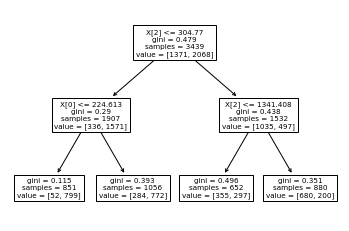

In [35]:
# plots a decision tree using scikit-learn

tree.plot_tree(tree_clf)

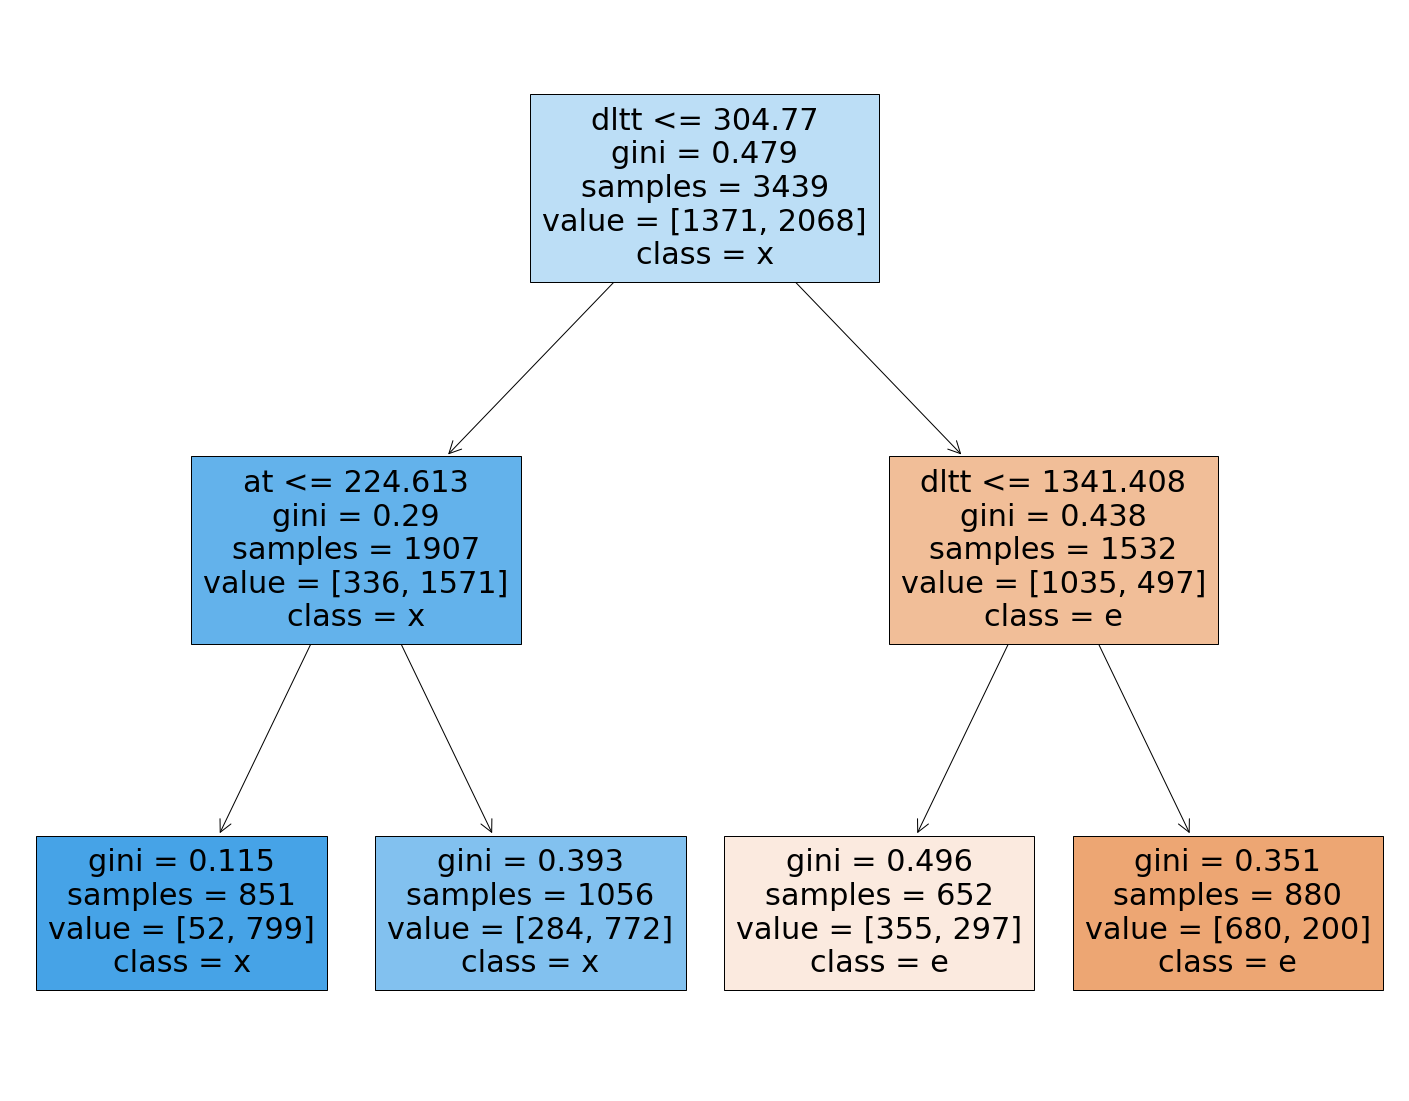

In [36]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree_clf, filled = True, feature_names=df.columns[:-1], 
          class_names=df.columns[-1])
plt.show()

In [37]:
# adding new features to the data frame

df.head()

,at,csho,dltt,ebit,ebitda,ni,prcc_c,prch_c,prcl_c,exchg
0,2079.000,35.097,670.900,108.400,152.100,4.400,45.10,52.78,29.84,11
1,59995.000,428.203,28875.000,3706.000,6024.000,1686.000,28.68,37.23,24.23,14
2,408.637,35.137,81.457,19.622,30.231,17.707,7.66,9.84,6.50,14
3,286.612,19.290,0.000,-1.173,-1.173,91.431,13.63,13.80,9.03,11
4,18479.247,112.436,4884.430,671.960,1262.889,538.320,89.93,99.81,81.63,11


In [38]:
# earnings per share: net income / number of shares outstanding

df['eps'] = df['ni'] / df['csho']

# return on assets: ebit / total assets

df['roa'] = df['ebit'] / df['at']

<ipython-input-38-980f5c5c028a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eps'] = df['ni'] / df['csho']
<ipython-input-38-980f5c5c028a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roa'] = df['ebit'] / df['at']


In [39]:
# check the new columns

df.columns

Index(['at', 'csho', 'dltt', 'ebit', 'ebitda', 'ni', 'prcc_c', 'prch_c',
       'prcl_c', 'exchg', 'eps', 'roa'],
      dtype='object')

In [40]:
#rearrange the columns

df = df[['at', 'csho', 'dltt', 'ebit', 'ebitda', 'ni', 'prcc_c', 'prch_c',
       'prcl_c', 'eps', 'roa', 'exchg']]

In [41]:
# check the order of columns

df.columns

Index(['at', 'csho', 'dltt', 'ebit', 'ebitda', 'ni', 'prcc_c', 'prch_c',
       'prcl_c', 'eps', 'roa', 'exchg'],
      dtype='object')

In [42]:
X = df.iloc[:, :-1].copy()     # we take all entries/ all columns (features) except exchg 
y = df.iloc[:, -1].copy()      # take all entries/ select the last coloum (exchg) 
y = np.where(y == 11, -1, 1)   # compnaies (entries) where exch = 11 (New york)
                               # convert labels to values -1 New york and 1 NASDAQ

In [43]:
# splits  data into training and test data.  we do it again because we have new features 
# test_size : proportion of data assigned to the test data  20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
# Training  perceptron after the new features added

ppn = Perceptron(eta=0.0002, n_iter=400)
ppn.fit(X_train.to_numpy(), y_train)       #.to_numpy() convert the dataframe to an array 

y_pred = ppn.predict(X_test.to_numpy())    #.to_numpy() convert the dataframe to an array 

print ('Misclassified: %d' % (y_test != y_pred).sum())          # see how many prediction that is missfitted 


Misclassified: 321


In [45]:
# returns how accurate is the prediction with respect to the actual data

accuracy_score(y_pred, y_test)

0.6267441860465116

In [46]:
# Train Decision Tree Classifer

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1)  # maximum depth of the tree 2 
tree_clf.fit(X_train, y_train)                                  # apply the fit method; x all entries features except exchg
                                                                # y exchange NYSE -1, NASDAQ 1

y_pred = tree_clf.predict(X_test)
print ('Misclassified: %d' % (y_test != y_pred).sum())          # see how many predictions that is missfitted 


Misclassified: 189


In [47]:
# returns how accurate is the prediction with respect to the actual data

accuracy_score(y_pred, y_test)

0.7802325581395348

[Text(167.4, 181.2, 'X[2] <= 304.77\ngini = 0.477\nsamples = 3439\nvalue = [1348, 2091]'),
 Text(83.7, 108.72, 'X[0] <= 169.393\ngini = 0.289\nsamples = 1931\nvalue = [339, 1592]'),
 Text(41.85, 36.23999999999998, 'gini = 0.087\nsamples = 747\nvalue = [34, 713]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.382\nsamples = 1184\nvalue = [305, 879]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 1341.408\ngini = 0.443\nsamples = 1508\nvalue = [1009, 499]'),
 Text(209.25, 36.23999999999998, 'gini = 0.497\nsamples = 642\nvalue = [344, 298]'),
 Text(292.95, 36.23999999999998, 'gini = 0.356\nsamples = 866\nvalue = [665, 201]')]

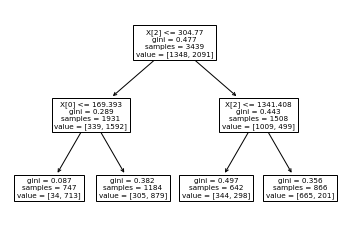

In [48]:
tree.plot_tree(tree_clf)

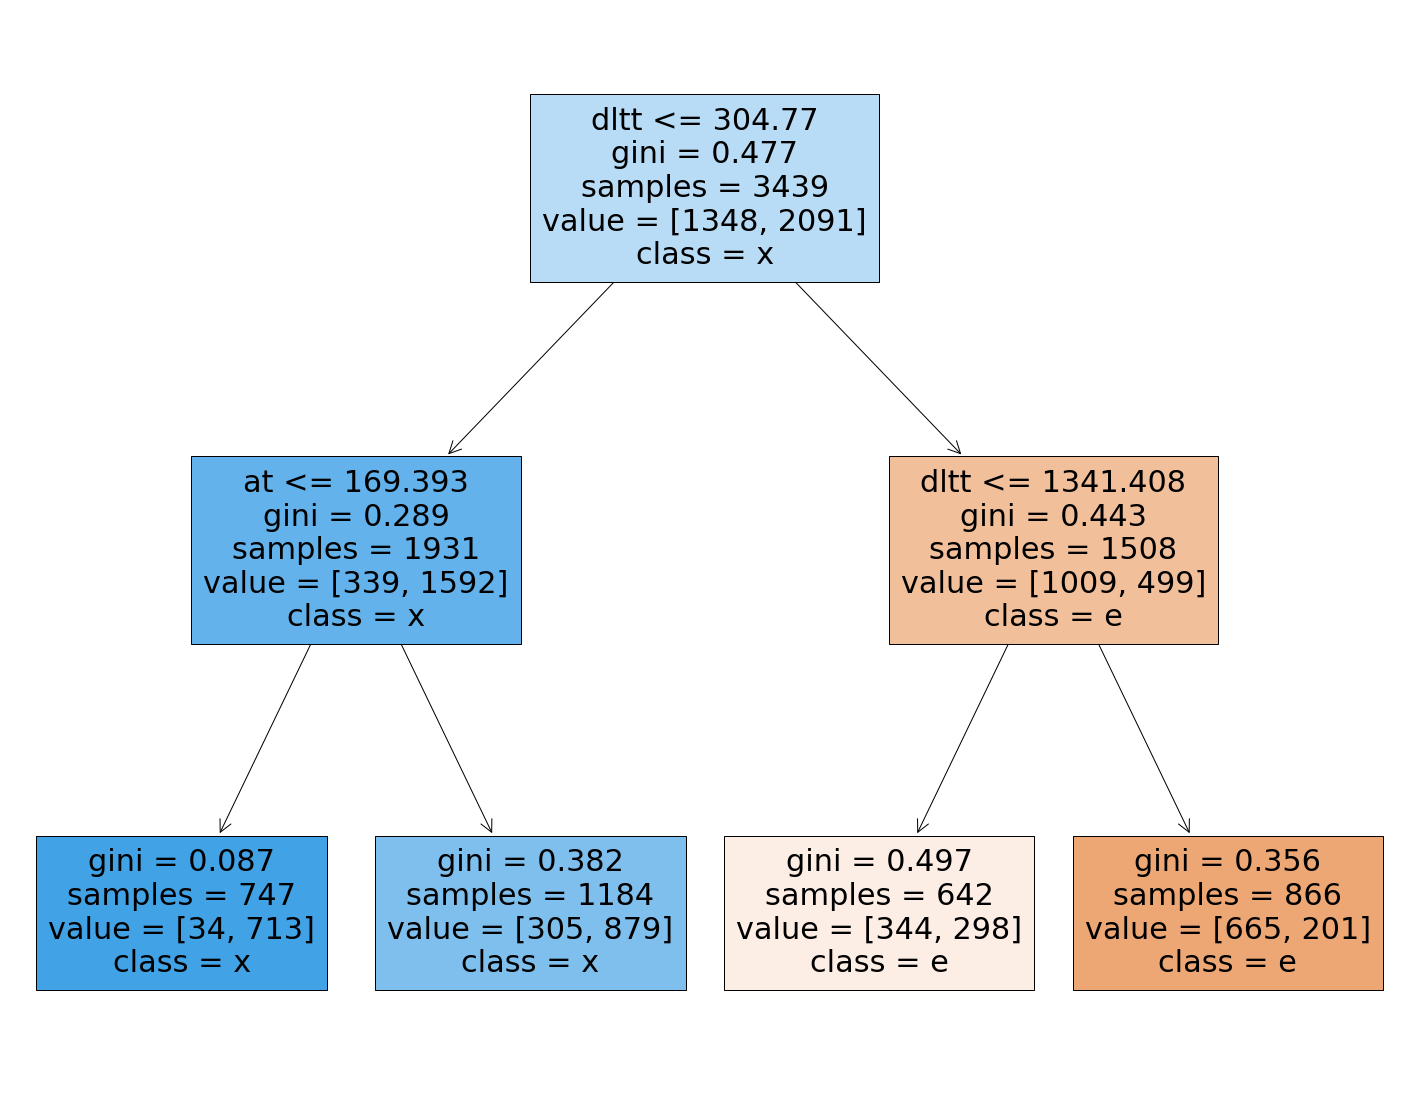

In [49]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree_clf, filled = True, feature_names=df.columns[:-1], 
          class_names=df.columns[-1])
plt.show()

# 2. Sentiment Analysis

Attached you will find a file `text_data.csv` that contains a list of sentences related to finance. For each sentence, i.e., for each row in the table, the data contains an indicator for sentiment: negative, positive, or neutral.

Please use the data to create a `bag-of-words` model using only `unigrams`. 

Split the data into training and test data and use a DecisionTreeClassifier to predict the sentiment.

As in the previous questions, train the model for various choices of hyperparameters and report the results for training and test data for each choice.

Repeat the task except that you now use both `unigrams` and `bigrams`.

In [50]:
df = pd.read_csv('text_data.csv', names=['class', 'text'], header=0, encoding="ISO-8859-1")
df.head()             # read the data and name the columns 

,class,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [51]:
# uni-grams are individual words
# .str     — converts value into a string
# .lower() — returns lower case letters
# ^        — to look for values beginning with the specified string
# \s       — represents the class of whitespace characters
# .split(expand=True) — splits the strings and expand them into separate columns
# .stack() — stacks the prescribed level(s) from columns to index

unigrams = (df['text'].str.lower().str.replace(r'[^a-z\s]', '').str.split(expand=True).stack())
#unigrams

In [52]:
# .value_counts().index returns object containing counts of unique values under each index

vocabulary = list(unigrams.value_counts().index)
vocabulary

['the',
 'of',
 'in',
 'and',
 'to',
 'a',
 'eur',
 'for',
 's',
 'is',
 'will',
 'company',
 'from',
 'on',
 'its',
 'mn',
 'has',
 'with',
 'by',
 'as',
 'said',
 'be',
 'finnish',
 'at',
 'it',
 'sales',
 'million',
 'that',
 'net',
 'profit',
 'was',
 'finland',
 'an',
 'group',
 'm',
 'operating',
 'mln',
 'are',
 'year',
 'new',
 'business',
 'period',
 'oyj',
 'quarter',
 'share',
 'also',
 'services',
 'which',
 'have',
 'market',
 'shares',
 'this',
 'first',
 'up',
 'euro',
 'been',
 'helsinki',
 'loss',
 'about',
 'compared',
 'operations',
 'today',
 'contract',
 'nokia',
 'total',
 'financial',
 'mobile',
 'percent',
 'products',
 'production',
 'per',
 'corporation',
 'bank',
 'we',
 'were',
 'companies',
 'according',
 'hel',
 'technology',
 'corresponding',
 'other',
 'plant',
 'solutions',
 'service',
 'our',
 'than',
 'capital',
 'increased',
 'construction',
 'agreement',
 'investment',
 'well',
 'increase',
 'more',
 'their',
 'customers',
 'us',
 'rose',
 'or',
 'n

In [53]:
# creating a dataframe with columns from our vocabulary list

bag_words = pd.DataFrame(columns=vocabulary, index=df.index)
bag_words

,the,of,in,and,to,a,eur,for,s,is,...,kuzaj,papel,itunesbased,highgrowth,minnbased,gloriya,enduses,tyumen,kasak,lietuvos
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# now filling this dataframe with the imdices of respective sentiment

n = df.shape[0]                                         # shape[0] is how many rows, assign that number to n

for i in range(n):                                      # for the range in "number of rows"
    for key, value in unigrams.at[i].iteritems():       # iterate unigrams over each key and value
        if bag_words.iloc[i][value] is not np.nan:      # if the value is not NaN
            bag_words.iloc[i][value] += 1               # add 1
        else:
            bag_words.iloc[i][value] = 1                # any other value set to 1

In [55]:
# filling NaN with zeros

bag_words.fillna(value=0, inplace=True)
bag_words.head()

,the,of,in,and,to,a,eur,for,s,is,...,kuzaj,papel,itunesbased,highgrowth,minnbased,gloriya,enduses,tyumen,kasak,lietuvos
0,1,1,3,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# assigning "class" column to "y"

y = df['class']
y

0        neutral
1       negative
2       positive
3       positive
4       positive
          ...   
4840    negative
4841     neutral
4842    negative
4843    negative
4844    negative
Name: class, Length: 4845, dtype: object

In [57]:
bag_words

,the,of,in,and,to,a,eur,for,s,is,...,kuzaj,papel,itunesbased,highgrowth,minnbased,gloriya,enduses,tyumen,kasak,lietuvos
0,1,1,3,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,1,0,2,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4841,0,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,1,1,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,3,3,2,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# assing "bag_words" to X and assigning "y" (the class) to y

X_train, X_test, y_train, y_test = train_test_split(bag_words, y, test_size=0.2)  

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)         # fit computes the mean and standard deviation
y_pred = model.predict(X_test)

In [61]:
accuracy_score(y_pred, y_test)

0.7151702786377709

In [62]:
from sklearn.metrics import f1_score

In [63]:
# f1 is how much correctly predicted

# average='macro' computes the metric independently for each class and then take the average
# average='micro' aggregates the contributions of all classes and then computes the average metric
# in a multi-class classification setup, micro-average is preferable if you suspect there might be a class imbalance

f1_score(y_pred, y_test, average='micro')

0.7151702786377709

In [64]:
f1_score(y_pred, y_test, average='macro')

0.6490622509555894

In [65]:
#model = DecisionTreeClassifier()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

- `GridSearchCV` uses cross-validation to train the model and determine the best hyper parameters
- `param_grid` contains various hyper parameters
- `gini` measures the impurity of the data in this node (if = 0, a node contains samples of only one category)
- `entropy` also measures impurity

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    # create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3,15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    # use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, verbose=0, cv=nfolds)    # verbose=3 displays time, score, max depth
                                                                                # cv determines the cross-validation splitting
                                                                                # strategy, in our case n-fold cross validation
    # fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv , dtree_gscv.score(X_test,y_test)
    


In [67]:
dtree_grid_search(X_train, y_train, 5)

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}),
 0.7296181630546955)

In [68]:
def dtree_grid_search(X,y,nfolds):
    # create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    # use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, verbose=0, cv=nfolds)    # verbose=3 displays time, score, max depth
                                                                                # cv determines the cross-validation splitting
                                                                                # strategy, in our case n-fold cross validation
    # fit model to data
    dtree_gscv.fit(X, y)
    return 'Best parameter set: ', dtree_gscv.best_params_ , 'Accuracy:', dtree_gscv.best_score_,'Test Accuracy',dtree_gscv.best_estimator_.score(X_test,y_test)
    
 

In [69]:
dtree_grid_search(X_train, y_train, 5)

('Best parameter set: ',
 {'criterion': 'gini', 'max_depth': 14},
 'Accuracy:',
 0.7270382440971067,
 'Test Accuracy',
 0.7265221878224974)

### Unigrams + Bigrams

In [70]:
# bi-grams are two words

bigrams = unigrams + ' ' + unigrams.shift(-1)
bigrams

0     0     technopolis plans
      1              plans to
      2            to develop
      3            develop in
      4             in stages
                  ...        
4844  8         sales outside
      9       outside finland
      10      finland dropped
      11           dropped by
      12                  NaN
Length: 93590, dtype: object

In [71]:
# .concat()      — concatenates objects
# .dropna()      — removes missing values
# .reset_index() — resets index of a Data Frame (the drop=True parameter is used to avoid the old index being added as a column)

grams = pd.concat([unigrams, bigrams]).dropna().reset_index(drop=True)
grams

0             technopolis
1                   plans
2                      to
3                 develop
4                      in
               ...       
187174        while sales
187175      sales outside
187176    outside finland
187177    finland dropped
187178         dropped by
Length: 187179, dtype: object

In [72]:
vocabulary = list(grams.value_counts().index)
vocabulary

['the',
 'of',
 'in',
 'and',
 'to',
 'a',
 'eur',
 'for',
 's',
 'is',
 'in the',
 'will',
 'company',
 'of the',
 'from',
 'on',
 'its',
 'mn',
 'has',
 'with',
 'by',
 'eur mn',
 'as',
 'said',
 'be',
 'finnish',
 'the company',
 'at',
 'it',
 'sales',
 'million',
 'that',
 'net',
 'profit',
 'for the',
 'was',
 'finland',
 'an',
 'group',
 'm',
 'to eur',
 'operating',
 'from eur',
 'mln',
 'are',
 'year',
 'will be',
 'new',
 'business',
 'period',
 'net sales',
 'to the',
 'oyj',
 'quarter',
 'share',
 'also',
 'of eur',
 'services',
 'which',
 'have',
 'eur million',
 'market',
 'mn in',
 'eur m',
 'shares',
 'operating profit',
 'first',
 'this',
 'and the',
 'up',
 'euro',
 'on the',
 'been',
 'helsinki',
 'the first',
 'quarter of',
 'in finland',
 'loss',
 'about',
 'to be',
 'today',
 'compared',
 'operations',
 'contract',
 'company s',
 'nokia',
 'total',
 'mobile',
 'financial',
 'percent',
 'products',
 'corporation',
 'production',
 'per',
 'bank',
 'at the',
 'we',
 '

In [73]:
# since we created a list with needed stuff, we can delete these dataframes:

del grams
del bigrams 
del unigrams

In [74]:
bag_words = pd.DataFrame(columns=vocabulary, index=df.index)

In [75]:
bag_words.fillna(value=0, inplace=True)

In [76]:
bag_words.shape

(4845, 56969)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(bag_words, y, test_size=0.2)

In [78]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
accuracy_score(y_pred, y_test)

0.586171310629515

In [80]:
f1_score(y_pred, y_test, average='micro')

0.586171310629515

In [81]:
f1_score(y_pred, y_test, average='macro')

0.24636738234656255

In [82]:
def dtree_grid_search(X,y,nfolds):
    # create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3,15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    # use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, verbose=0, cv=nfolds)    # verbose=3 displays time, score, max depth
                                                                                # cv determines the cross-validation splitting
                                                                                # strategy, in our case n-fold cross validation
    # fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv , dtree_gscv.score(X_test,y_test)
    


In [83]:
dtree_grid_search(X_train, y_train, 5)

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}),
 0.586171310629515)

In [84]:
def dtree_grid_search(X,y,nfolds):
    # create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    # use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, verbose=0, cv=nfolds)    # verbose=3 displays time, score, max depth
                                                                                # cv determines the cross-validation splitting
                                                                                # strategy, in our case n-fold cross validation
    # fit model to data
    dtree_gscv.fit(X, y)
    return 'Best parameter set: ', dtree_gscv.best_params_ , 'Accuracy:', dtree_gscv.best_score_,'Test Accuracy',dtree_gscv.best_estimator_.score(X_test,y_test)
    
 

In [85]:
dtree_grid_search(X_train, y_train, 5)

('Best parameter set: ',
 {'criterion': 'gini', 'max_depth': 3},
 'Accuracy:',
 0.5959753907549052,
 'Test Accuracy',
 0.586171310629515)